In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plantvillage_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 0 1 2 0 0 0 1 1 0 1 1 1 1 1 1 1 1 2 0 0 2 0 1 1 0 1 0 1]


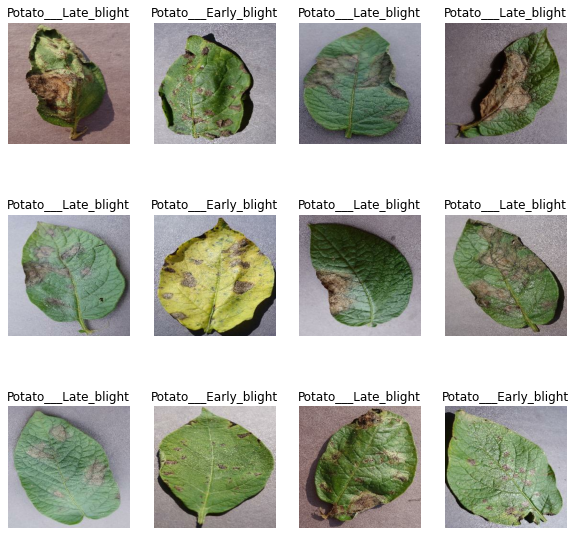

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

68

80% ==> training , 
20% ==> 10% validation and 10% test 

In [9]:
train_size = 0.8
len(dataset)*train_size



54.400000000000006

In [10]:
train_ds= dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size 

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split= 0.8, val_split=0.1, test_split=0.1,shuffle= True, shuffle_size= 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

CNN

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3 

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs = EPOCHS, 
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 207s 4s/step - loss: 0.9144 - accuracy: 0.5220 - val_loss: 0.8753 - val_accuracy: 0.5677
Epoch 2/50
54/54 [==============================] - 18795s 355s/step - loss: 0.7343 - accuracy: 0.6962 - val_loss: 0.5560 - val_accuracy: 0.7396
Epoch 3/50
54/54 [==============================] - 118s 2s/step - loss: 0.4499 - accuracy: 0.8148 - val_loss: 0.2426 - val_accuracy: 0.8906
Epoch 4/50
54/54 [==============================] - 114s 2s/step - loss: 0.3239 - accuracy: 0.8709 - val_loss: 0.1819 - val_accuracy: 0.9167
Epoch 5/50
54/54 [==============================] - 115s 2s/step - loss: 0.2605 - accuracy: 0.8958 - val_loss: 0.2117 - val_accuracy: 0.9219
Epoch 6/50
54/54 [==============================] - 118s 2s/step - loss: 0.2244 - accuracy: 0.9138 - val_loss: 0.1946 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 116s 2s/step - loss: 0.2147 - accuracy: 0.9109 - val_loss: 0.2686 - val_accuracy: 0.8958
Epoch 8/5

In [27]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 7s 547ms/step - loss: 0.2896 - accuracy: 0.9336


In [28]:
scores

[0.2895582616329193, 0.93359375]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
history.history['accuracy']

[0.5219907164573669,
 0.6961805820465088,
 0.8148148059844971,
 0.8709490895271301,
 0.8958333134651184,
 0.9137731194496155,
 0.9108796119689941,
 0.9340277910232544,
 0.9317129850387573,
 0.9305555820465088,
 0.9479166865348816,
 0.9490740895271301,
 0.9594907164573669,
 0.9502314925193787,
 0.9623842835426331,
 0.9554398059844971,
 0.9641203880310059,
 0.9699074029922485,
 0.9612268805503845,
 0.9542824029922485,
 0.9664351940155029,
 0.9589120149612427,
 0.9722222089767456,
 0.9745370149612427,
 0.9693287014961243,
 0.9762731194496155,
 0.9675925970077515,
 0.9745370149612427,
 0.9664351940155029,
 0.9756944179534912,
 0.984375,
 0.9797453880310059,
 0.9756944179534912,
 0.9855324029922485,
 0.9693287014961243,
 0.9855324029922485,
 0.9918981194496155,
 0.9849537014961243,
 0.9878472089767456,
 0.9820601940155029,
 0.9907407164573669,
 0.9895833134651184,
 0.9936342835426331,
 0.9837962985038757,
 0.9849537014961243,
 0.9641203880310059,
 0.9814814925193787,
 0.9884259104728699,
 0

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

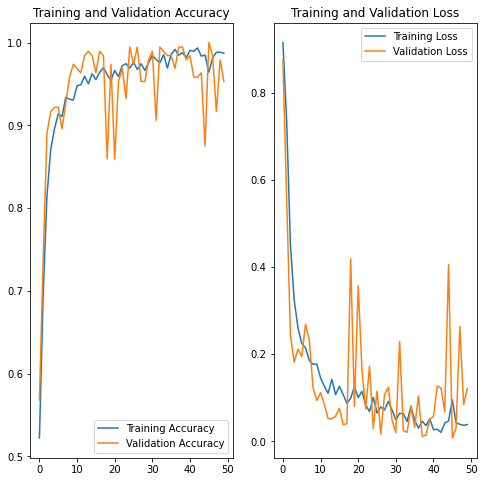

In [34]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()


In [35]:
import numpy as np

first image to predict
Actual label: Potato___Late_blight
1/1 [==============================] - 1s 728ms/step
predicted label: Potato___Late_blight


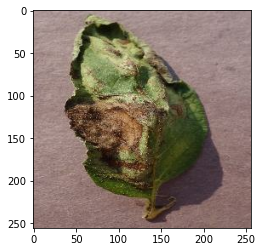

In [36]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) 
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


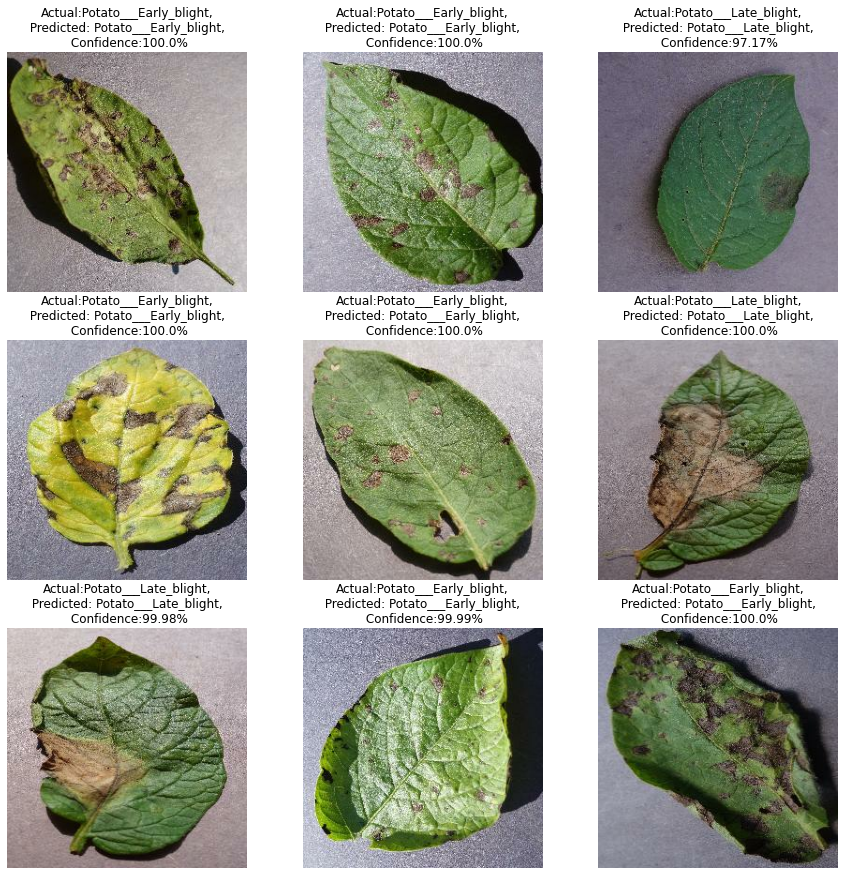

In [38]:
plt.figure(figsize=(15, 15))
for images , labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}, \n Confidence:{confidence}%")
        
        plt.axis("off")
        

In [39]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [40]:
import os
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/5\assets


INFO:tensorflow:Assets written to: ../models/5\assets
